# Project - Sales Analysis 

In [188]:
# import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
# For reproducibility in plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (24, 10)
sns.set(rc={'figure.figsize': (20, 8)})

In [190]:
# Load the dataset, parse the date column and other object types column to appropriate column type 
df= pd.read_csv('AusApparalSales4thQrt2020.csv', parse_dates=['Date'], dtype={'Time': str, 'State': str, 'Group': str})
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


# 1. Data wrangling
Here w will analyse the data for any missing or incorrect data.

In [191]:
# Check if there is any missing values in dataset
print(df.isna().sum())
print(f"There are {df.isna().sum().sum()} missing values")

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
There are 0 missing values


In [192]:
# Since there is no missing values, each column has equal length
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [193]:
# let's check the basic information about the dataset
# There are 5 column of each 7560 values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [194]:
# Check for any duplicate rows
df.duplicated().sum()

0

In [195]:
# basic statistical data about dataset (unit and sales columns)
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


### Since there is no missing values or duplicate row. No need to add or remove values

In [196]:
# Normalize the data in the Sales and Unit columns for better analysis
#from sklearn.preprocessing import MinMaxScaler

# Normalization of Sales and Unit columns
#scaler = MinMaxScaler()
#df[['Sales', 'Unit']] = scaler.fit_transform(df[['Sales', 'Unit']])
#df.head()

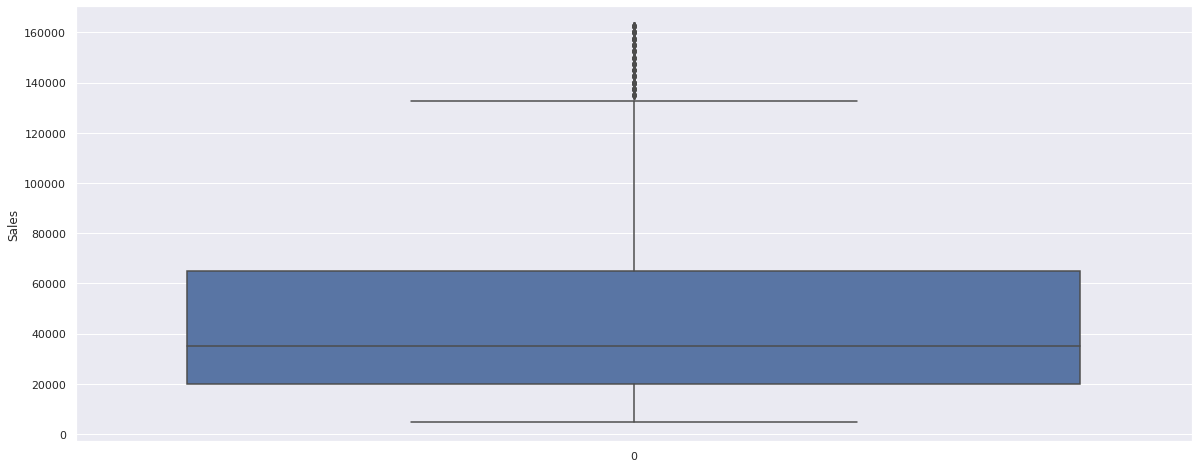

In [197]:
sns.boxplot(data=df['Sales'])
plt.ylabel('Sales')
plt.show()

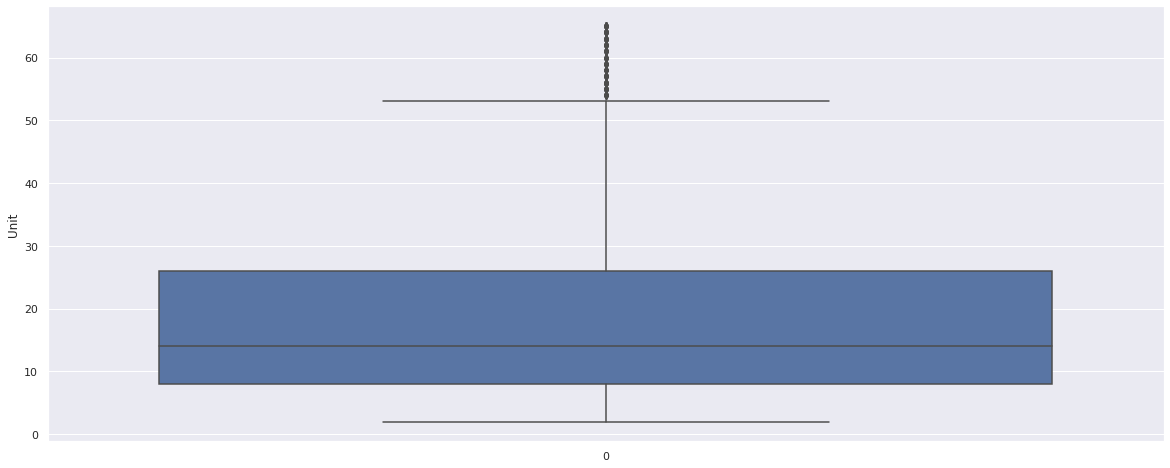

In [198]:
sns.boxplot(data=df['Unit'])
plt.ylabel('Unit')
plt.show()

- By Seeing above box plot for Sales and Unit, It looks like there are outliers present. 
but we have to see this data at group and state level.

### Box plot of State wise sales data. There is no outliers for state wise data

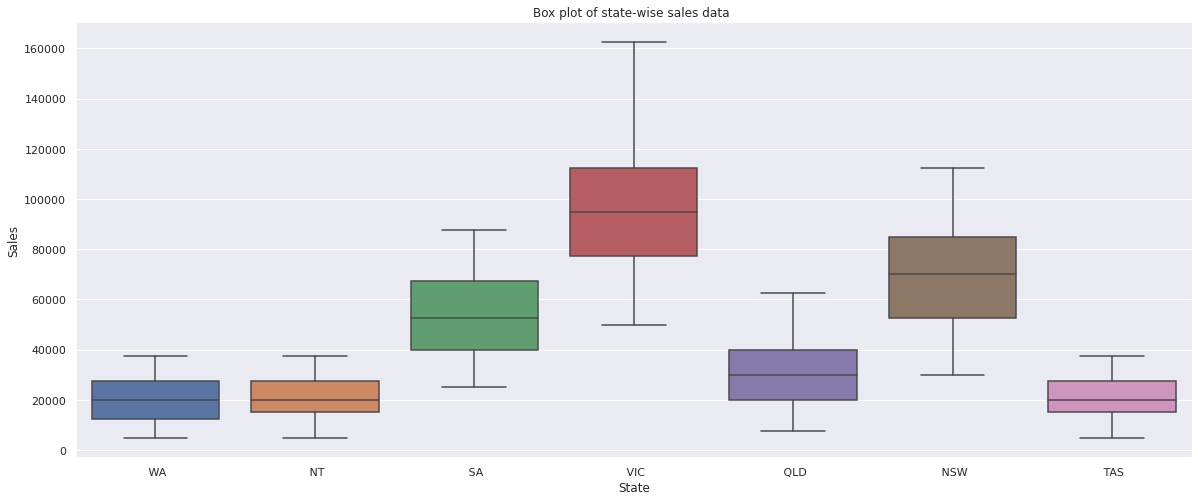

In [199]:
sns.boxplot(data=df, y='Sales', x = 'State')
plt.title("Box plot of state-wise sales data ")
plt.show()

We can also infer from above plot that average sales for **VIC** state is higher then the rest of the states.

### Box plot of State wise sales data of each group. There is no outliers for state wise data across the groups

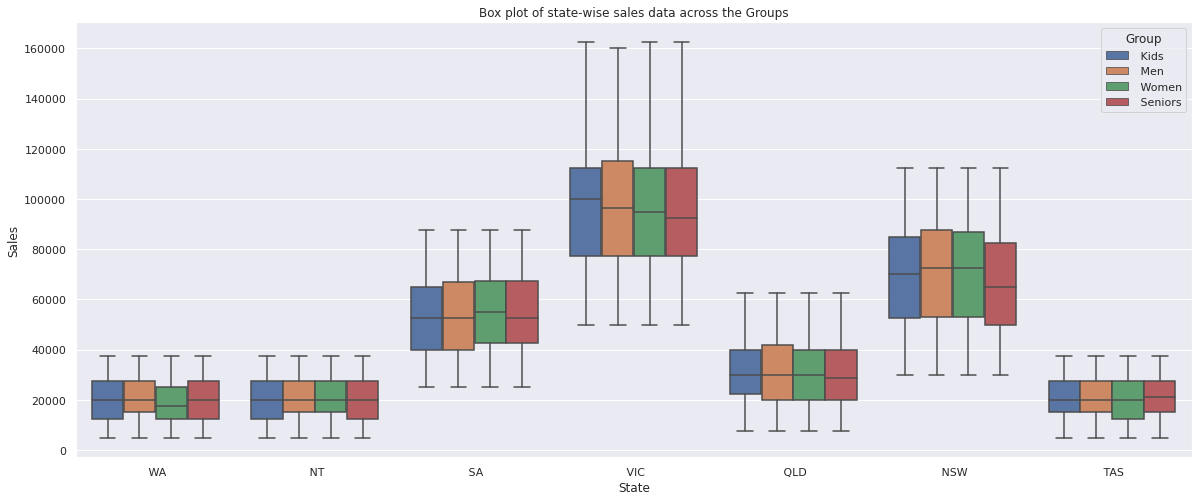

In [200]:
sns.boxplot(data=df, y='Sales', x = 'State', hue='Group')
plt.title("Box plot of state-wise sales data across the Groups")
plt.show()

### Similarly other combinations of sales as below.

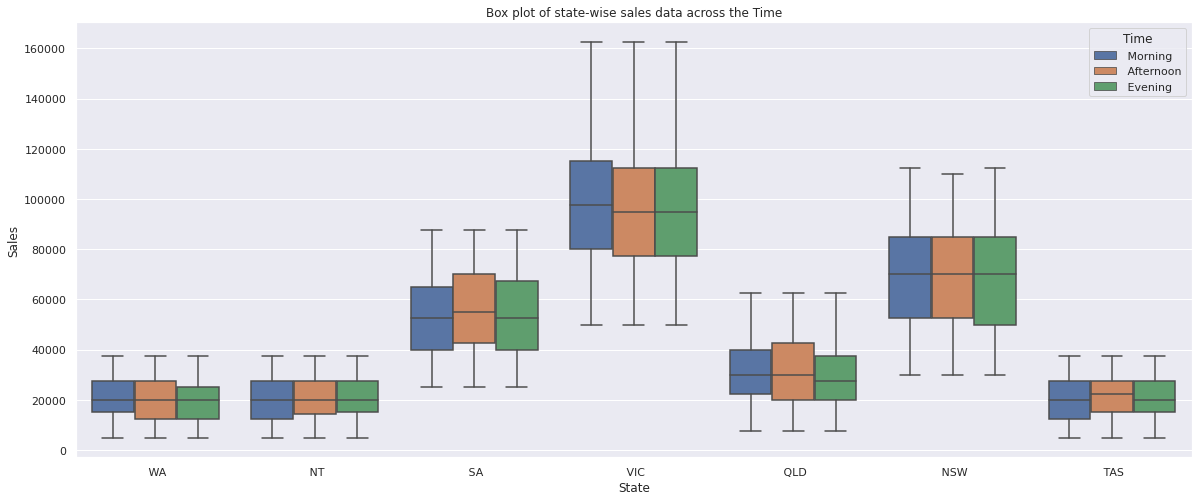

In [201]:
sns.boxplot(data=df, y='Sales', x = 'State', hue='Time')
plt.title("Box plot of state-wise sales data across the Time")
plt.show()

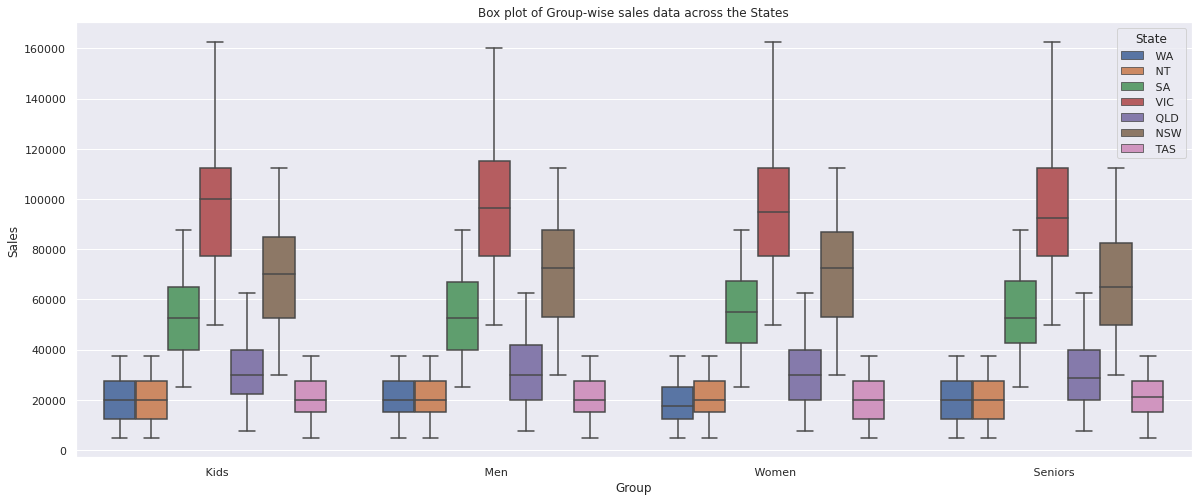

In [202]:
sns.boxplot(data=df, y='Sales', x = 'Group', hue='State')
plt.title("Box plot of Group-wise sales data across the States")
plt.show()

## Calculate IQR and Identify Outliers:

In [203]:
# Calculate IQR for each numerical column
num_df = df[['Unit', 'Sales']]
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Determine outliers using IQR
outliers = ((num_df < lower_bound) | (num_df > upper_bound))

# Filter the DataFrame to display only rows with outliers
outlier_rows = df[outliers.any(axis=1)]
print(outlier_rows)

           Date        Time State     Group  Unit   Sales
5082 2020-12-01   Afternoon   VIC     Women    63  157500
5083 2020-12-01   Afternoon   VIC   Seniors    62  155000
5161 2020-12-02     Morning   VIC       Men    56  140000
5162 2020-12-02     Morning   VIC     Women    59  147500
5169 2020-12-02     Evening   VIC       Men    64  160000
...         ...         ...   ...       ...   ...     ...
7432 2020-12-29   Afternoon   VIC      Kids    65  162500
7433 2020-12-29   Afternoon   VIC       Men    54  135000
7437 2020-12-29     Evening   VIC       Men    54  135000
7515 2020-12-30     Morning   VIC   Seniors    65  162500
7519 2020-12-30   Afternoon   VIC   Seniors    62  155000

[123 rows x 6 columns]


In [204]:
# Display outliers for each numerical column individually
for col in num_df.columns:
    if outliers[col].any():
        print(f"Outliers in {col}:")
        print(df.loc[outliers[col], col])
        print("\n")

Outliers in Unit:
5082    63
5083    62
5161    56
5162    59
5169    64
        ..
7432    65
7433    54
7437    54
7515    65
7519    62
Name: Unit, Length: 123, dtype: int64


Outliers in Sales:
5082    157500
5083    155000
5161    140000
5162    147500
5169    160000
         ...  
7432    162500
7433    135000
7437    135000
7515    162500
7519    155000
Name: Sales, Length: 123, dtype: int64




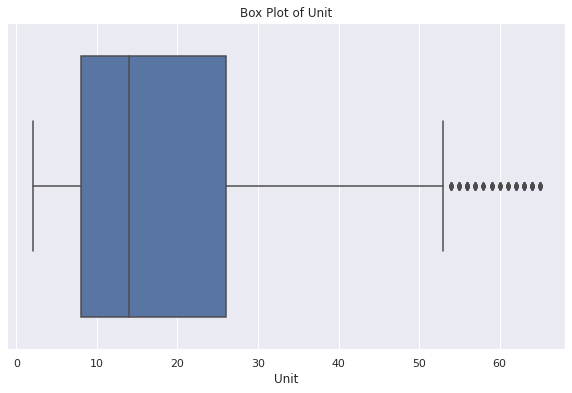

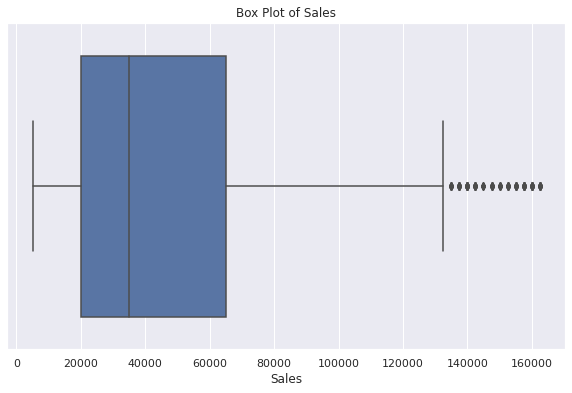

In [205]:
# box for all numerical columns [Unit, sales]
numerical_features = df.select_dtypes(include=['int64', 'float64'])
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

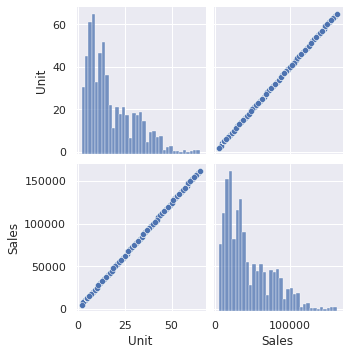

In [206]:
# pairplot of Sales and unit column to see the relationship
sns.pairplot(df)

## Hanlde the outliers
- Replace the outliers with the nearest boundary values. By doing this we can preserve the shape of data distribution while reducing the impact of outliers.

In [207]:
# Cap and floor outliers
df_cleaned = df.copy()  # Create a copy of the original DataFrame to preserve the original data

for col in numerical_features:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)
    

In [208]:
# Verify by checking the statistical summary or plotting
print(df_cleaned.describe())


              Unit          Sales
count  7560.000000    7560.000000
mean     17.897619   44744.047619
std      12.568314   31420.786219
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      53.000000  132500.000000


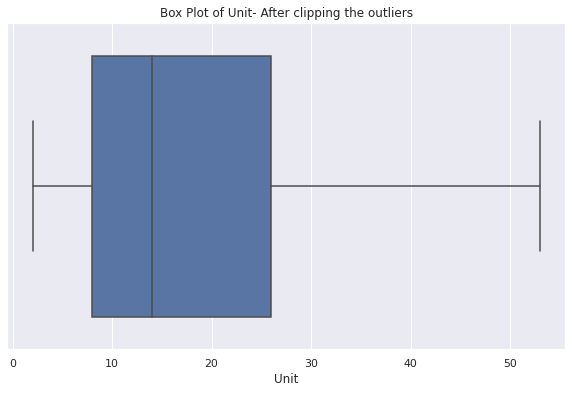

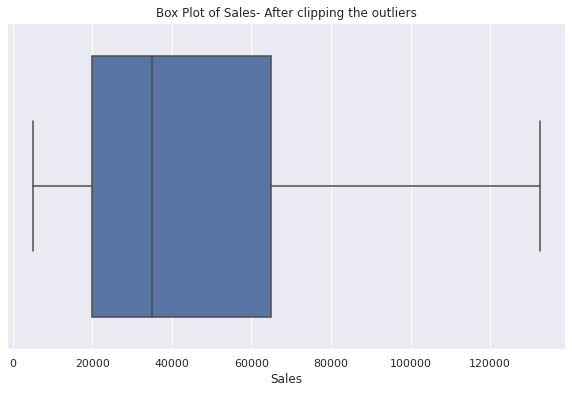

In [209]:
# box plot for all numerical columns [Unit, sales] after cap and floor (Winsorizing) the outliers
for col in ['Unit', 'Sales']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Box Plot of {col}- After clipping the outliers')
    plt.show()

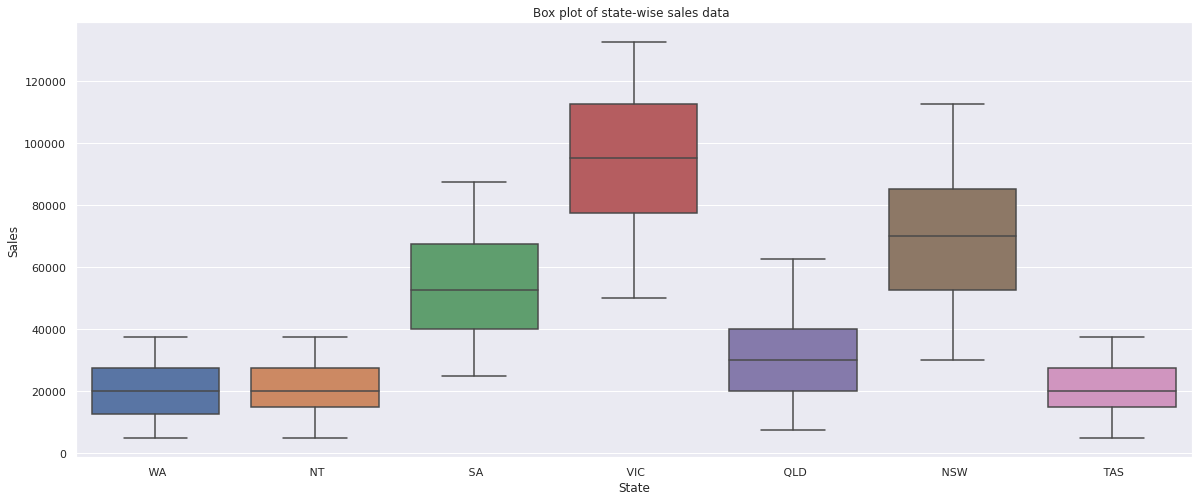

In [210]:
sns.boxplot(data=df_cleaned, y='Sales', x = 'State')
plt.title("Box plot of state-wise sales data ")
plt.show()

## Normalization:
Rescale feature values within a predefined range, typically between 0 and 1 (or -1 and 1). I am using MinMax scaler here.

In [211]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler().set_output(transform="pandas")

df_cleaned[numerical_features.columns] = scale.fit_transform(df_cleaned[numerical_features.columns])
#df_scaled = pd.DataFrame(scaled, columns= ['Sales', 'Unit'])
df_cleaned.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,0.311718,0.311718
std,0.246438,0.246438
min,0.000000,0.000000
25%,0.117647,0.117647
50%,0.235294,0.235294
75%,0.470588,0.470588
max,1.000000,1.000000


# 2. Data Analysis

In [212]:
stats_summary = df[numerical_features.columns].agg(['mean', 'median','std'])
print(stats_summary)

             Unit         Sales
mean    18.005423  45013.558201
median  14.000000  35000.000000
std     12.901403  32253.506944


In [213]:
# Descriptive statistics
df[numerical_features.columns].describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [214]:
# Descriptive statistics
print("Mode of Sales:", df['Sales'].mode()[0])
print("="*50)
print("Mode of Units:", df['Unit'].mode()[0])


Mode of Sales: 22500
Mode of Units: 9


In [215]:
print("==============Group wise analysis ========================\n")
group_sales = df.groupby(['Group'])['Sales'].sum()
print(group_sales.reset_index())

highest_sales = group_sales.idxmax()
lowest_sales = group_sales.idxmin()

print(f"Group with the highest sales: {highest_sales}")
print(f"Group with the lowest sales: {lowest_sales}\n")

print("==============State wise analysis:========================= \n")
state_sales = df.groupby(['State'])['Sales'].sum()
print(state_sales.reset_index())

highest_sales = state_sales.idxmax()
lowest_sales = state_sales.idxmin()

print(f"State with the highest sales: {highest_sales}")
print(f"State with the lowest sales: {lowest_sales}\n")

print("==============Time wise analysis:=========================\n")
time_sales =df.groupby(['Time'])['Sales'].sum()
print(time_sales.reset_index())

highest_sales = time_sales.idxmax()
lowest_sales = time_sales.idxmin()

print(f"Time with the highest sales: {highest_sales}")
print(f"Time with the lowest sales: {lowest_sales}")


==============Group wise analysis ========================

      Group     Sales
0      Kids  85072500
1       Men  85750000
2   Seniors  84037500
3     Women  85442500
Group with the highest sales:  Men
Group with the lowest sales:  Seniors

==============State wise analysis:========================= 

  State      Sales
0   NSW   74970000
1    NT   22580000
2   QLD   33417500
3    SA   58857500
4   TAS   22760000
5   VIC  105565000
6    WA   22152500
State with the highest sales:  VIC
State with the lowest sales:  WA

==============Time wise analysis:=========================

         Time      Sales
0   Afternoon  114007500
1     Evening  112087500
2     Morning  114207500
Time with the highest sales:  Morning
Time with the lowest sales:  Evening


In [216]:

# Set the Date as the index for resampling
df.set_index('Date', inplace=True)

# Generate aggregated reports using resampling
daily_sales     = df['Sales'].resample('D').sum()  # Daily Sales Report
weekly_sales    = df['Sales'].resample('W').sum()  # Weekly Sales Report
monthly_sales   = df['Sales'].resample('M').sum()  # Monthly Sales Report
quarterly_sales = df['Sales'].resample('Q').sum()  # Quarterly Sales Report


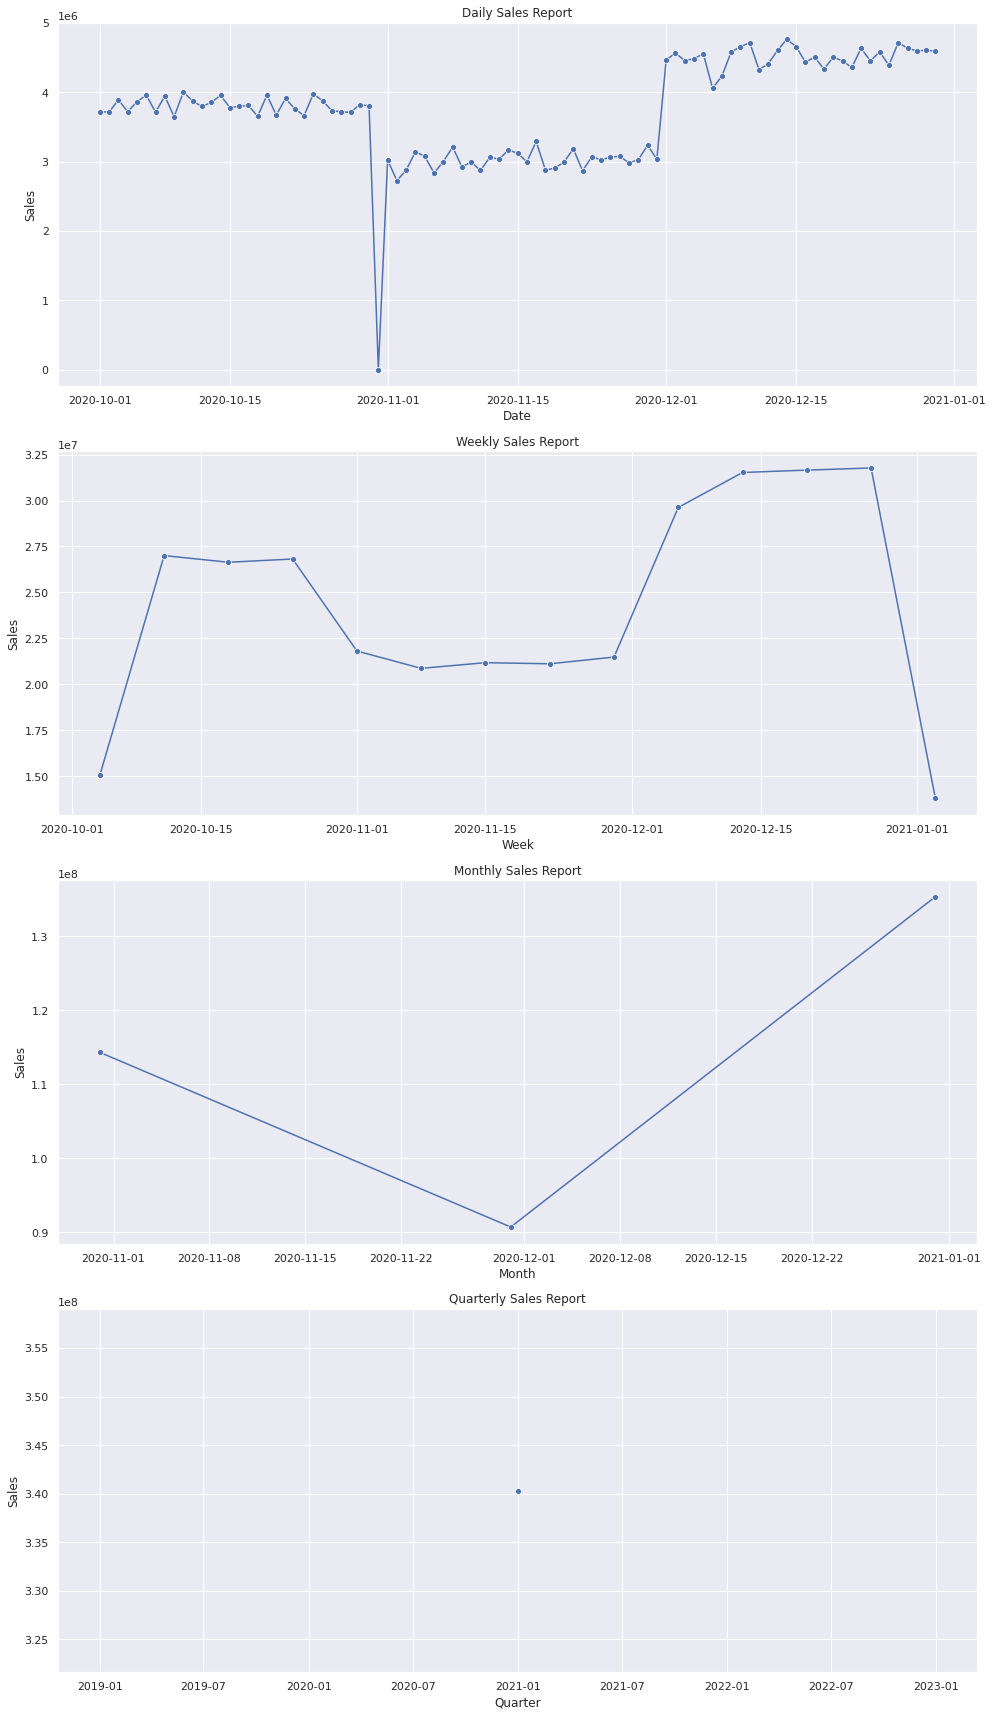

In [217]:
# Create subplots to display all four charts in a dashboard format
fig, ax = plt.subplots(4, 1, figsize=(14, 24))

# Daily Sales Chart
sns.lineplot(x=daily_sales.index, y=daily_sales.values, ax=ax[0], marker="o")
ax[0].set_title("Daily Sales Report")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Sales")

# Weekly Sales Chart
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, ax=ax[1],marker="o")
ax[1].set_title("Weekly Sales Report")
ax[1].set_xlabel("Week")
ax[1].set_ylabel("Sales")

# Monthly Sales Chart
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, ax=ax[2],marker="o")
ax[2].set_title("Monthly Sales Report")
ax[2].set_xlabel("Month")
ax[2].set_ylabel("Sales")

# Quarterly Sales Chart
sns.lineplot(x=quarterly_sales.index, y=quarterly_sales.values, ax=ax[3], marker="o")
ax[3].set_title("Quarterly Sales Report")
ax[3].set_xlabel("Quarter")
ax[3].set_ylabel("Sales")

plt.tight_layout()
plt.show()

# 3. Data Visualization

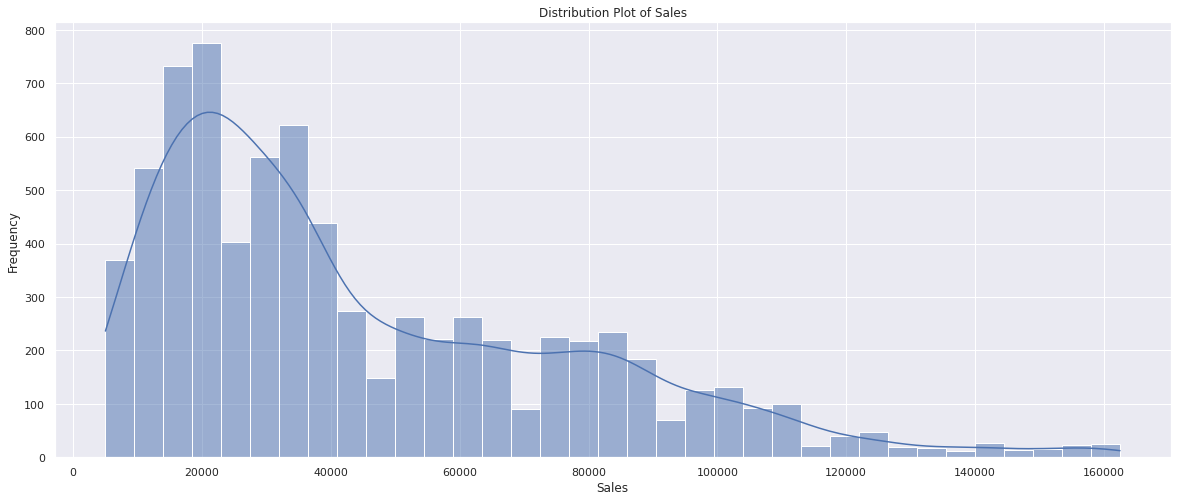

In [218]:
# Sales distribution
sns.histplot(df['Sales'], kde=True)
plt.title("Distribution Plot of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

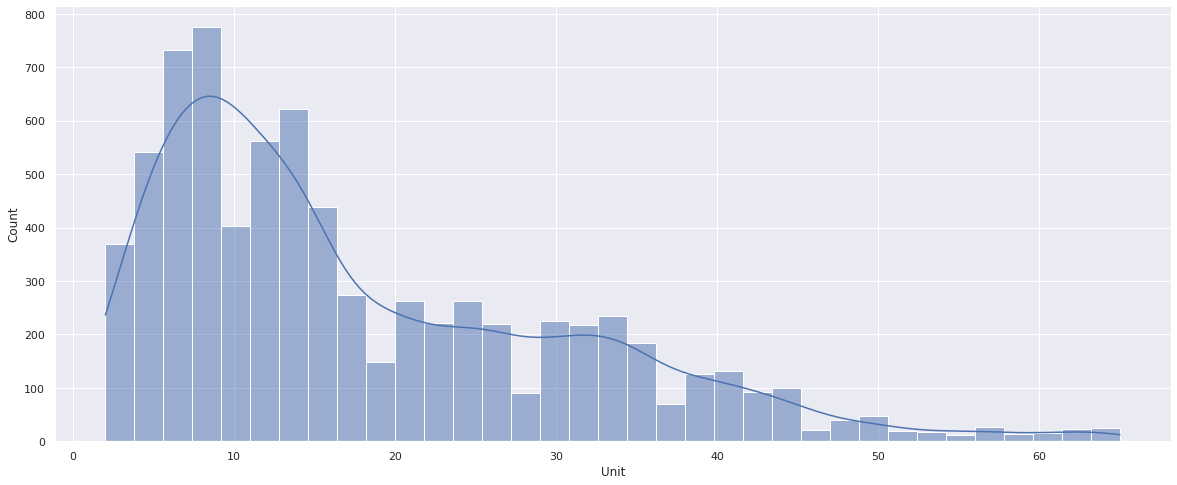

In [219]:
sns.histplot(data=df['Unit'], kde=True)
plt.show()

## > Sales and unit distributions seems to have left skew shape. Higher frequncies of low sale value and units

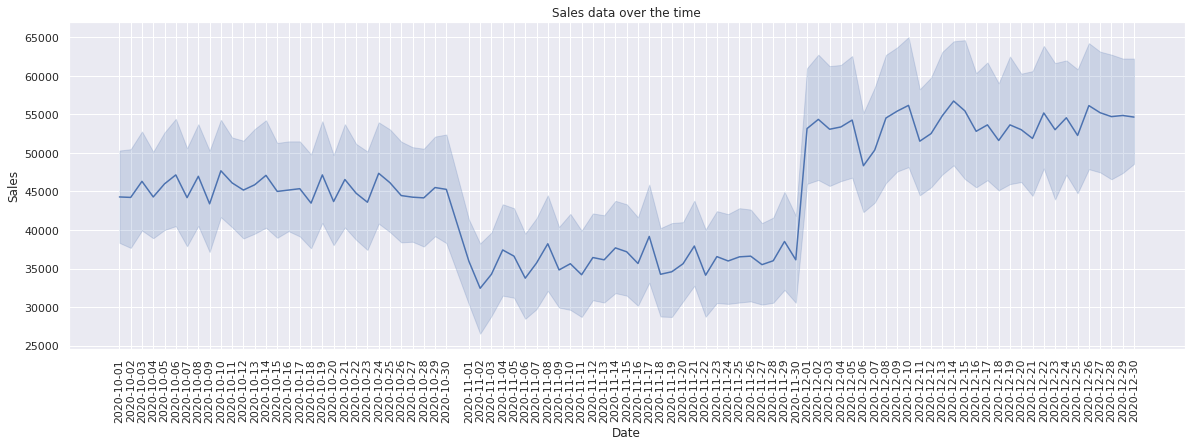

In [220]:
# Plot the Sales data over the entire period to see how it has changed over the time.
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x="Date", y="Sales", sort=True)
plt.title('Sales data over the time')
plt.xticks(df.index.unique(), rotation=90)
plt.show()

### We can see that sales for November month was down compare to other months. And December month has highest sales

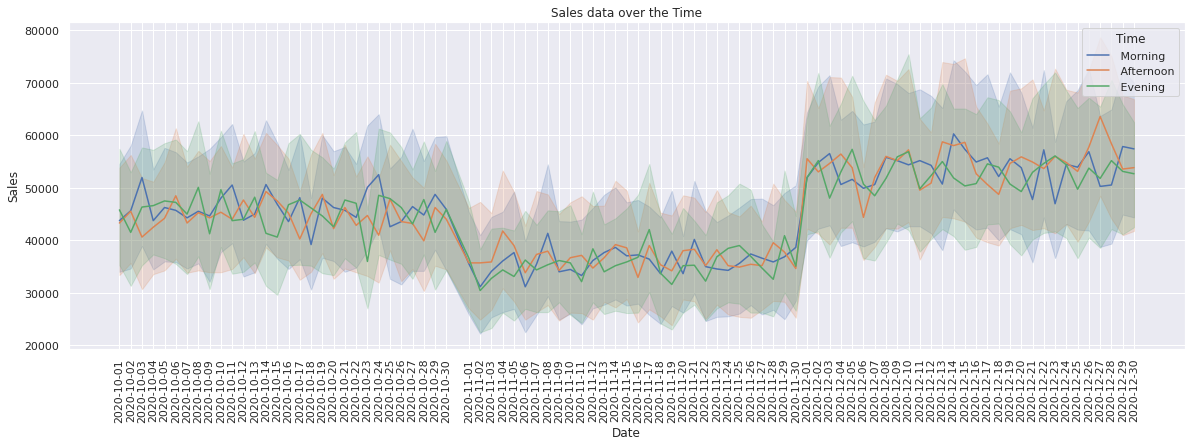

In [221]:
# let see sales data for different Time Frame like Morning, AfterNoon and Evening
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x="Date", y="Sales", hue='Time', sort=True)
plt.title('Sales data over the Time')
plt.xticks(df.index.unique(), rotation=90)
plt.show()

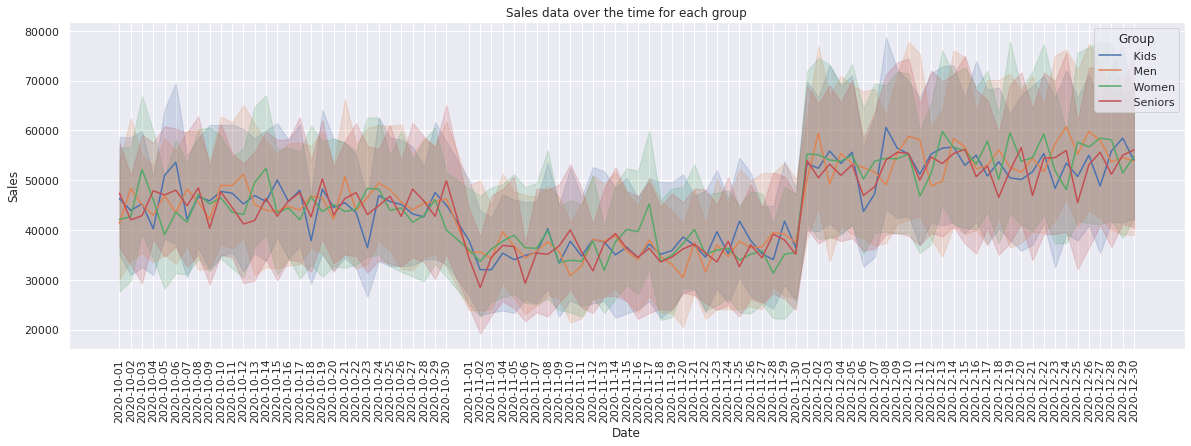

In [222]:
# let see sales data changing for different Groups like Kids, Men, Women and Seniors
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x="Date", y="Sales", hue='Group', sort=True)
plt.title('Sales data over the time for each group')
plt.xticks(df.index.unique(), rotation=90)
plt.show()

### Sales data categaries by State, Time and Group

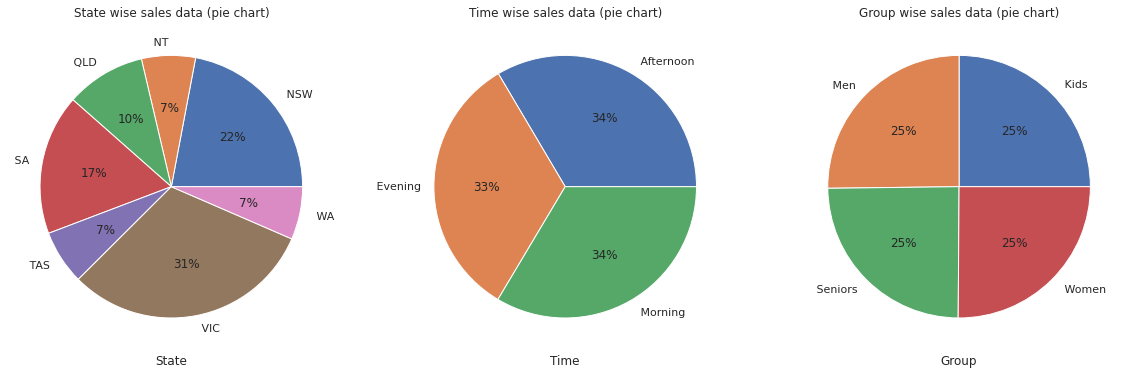

In [223]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for i, col in enumerate(['State', "Time", 'Group']):
    data = df.groupby([col])['Sales'].sum()
    ax[i].pie(data,labels= data.index.to_list(),autopct='%.0f%%')
    ax[i].set(title=f'{col} wise sales data (pie chart)', xlabel=col)
plt.show()

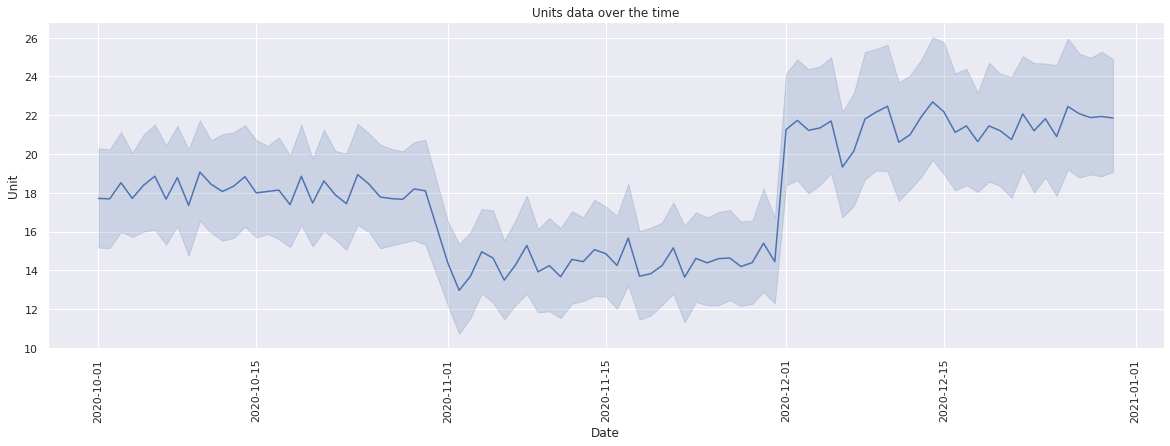

In [224]:
# Similary the Units also follow, it has same pattern as Sales data. 
plt.figure(figsize=(20, 6))
sns.lineplot(data=df, x="Date", y="Unit", sort=True)
plt.xticks(rotation=90)
plt.title('Units data over the time')
plt.show()

### Below we will see the data month wise. we shall calculate the sale data for Oct, Nov and Dec Month and plot line gragh. 

In [225]:
# calculate the unit and sales data for each month
df_unit_and_sales = df.groupby(['Date'])[['Unit','Sales']].sum()

print(df_unit_and_sales)
# split using dates
df_oct = df_unit_and_sales.loc['2020-10-01':'2020-10-30']
df_nov = df_unit_and_sales.loc['2020-11-01':'2020-11-30']
df_dec = df_unit_and_sales.loc['2020-12-01':'2020-12-31']

oct_days = df_oct.index.day
oct_days.astype('str')
nov_days = df_nov.index.day
nov_days.astype('str')
dec_days = df_dec.index.day
dec_days.astype('str')

            Unit    Sales
Date                     
2020-10-01  1488  3720000
2020-10-02  1486  3715000
2020-10-03  1556  3890000
2020-10-04  1488  3720000
2020-10-05  1545  3862500
...          ...      ...
2020-12-26  1886  4715000
2020-12-27  1855  4637500
2020-12-28  1838  4595000
2020-12-29  1843  4607500
2020-12-30  1836  4590000

[90 rows x 2 columns]


Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30'],
      dtype='object', name='Date')

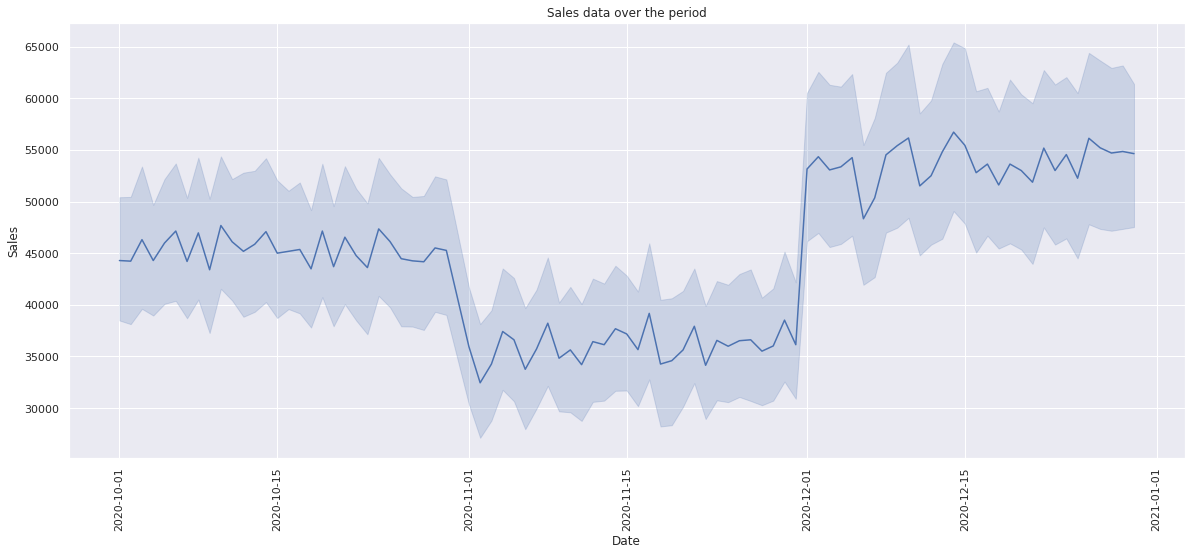

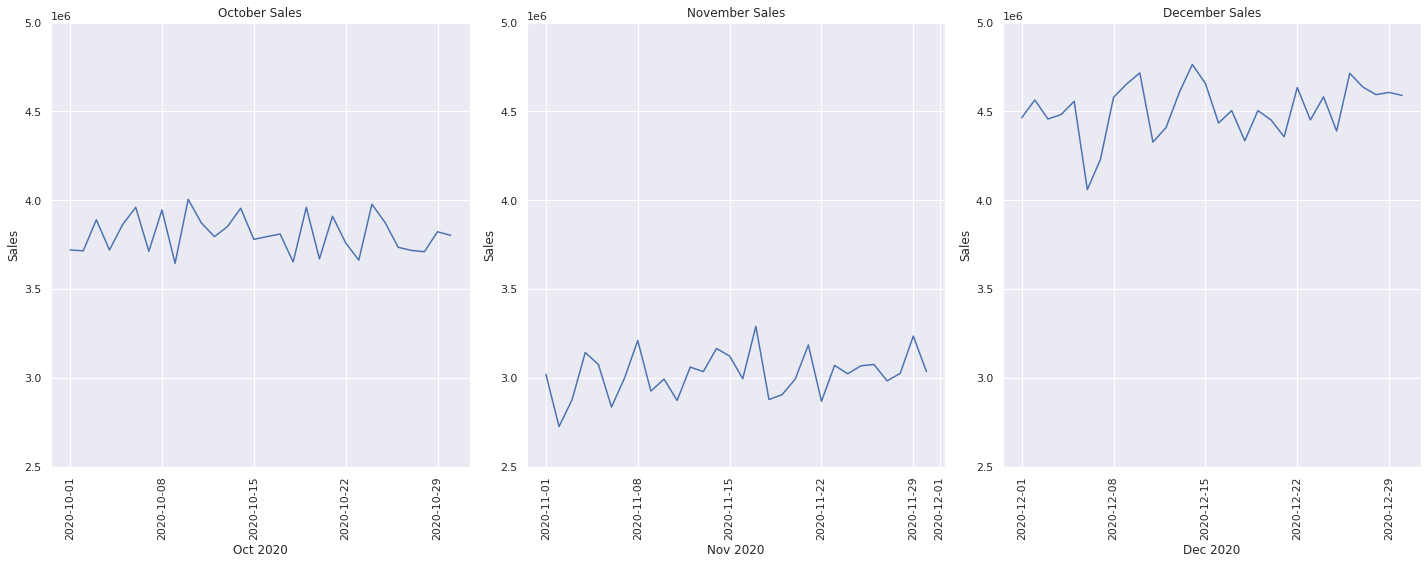

In [226]:
import matplotlib.dates


# First plot for Date vs Unit
sns.lineplot(x='Date', y='Sales', data=df)
plt.title('Sales data over the period')
plt.xticks(rotation=90)
plt.show()

# Subplots for Oct, Nov, Dec sales data
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# October sales plot
lp_oct = sns.lineplot(x=df_oct.index, y='Sales', data=df_oct, ax=axes[0])
lp_oct.set(ylim=(2.5e6, 5.0e6))
lp_oct.set(xlabel='Oct 2020', title='October Sales')
loc_oct = matplotlib.dates.DayLocator(bymonthday=range(1, 30, 7))
lp_oct.xaxis.set_major_locator(loc_oct)
lp_oct.tick_params(axis='x', rotation=90)

# November sales plot
lp_nov = sns.lineplot(x=df_nov.index, y='Sales', data=df_nov, ax=axes[1])
lp_nov.set(ylim=(2.5e6, 5.0e6))
lp_nov.set(xlabel='Nov 2020', title='November Sales')
loc_nov = matplotlib.dates.DayLocator(bymonthday=range(1, 30, 7))
lp_nov.xaxis.set_major_locator(loc_nov)
lp_nov.tick_params(axis='x', rotation=90)

# December sales plot
lp_dec = sns.lineplot(x=df_dec.index, y='Sales', data=df_dec, ax=axes[2])
lp_dec.set(ylim=(2.5e6, 5.0e6))
lp_dec.set(xlabel='Dec 2020', title='December Sales')
loc_dec = matplotlib.dates.DayLocator(bymonthday=range(1, 30, 7))
lp_dec.xaxis.set_major_locator(loc_dec)
lp_dec.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


### Below we have done different grouping studies on Sales data.
- Sales data presented in form of bar chart group by State, Time and demographic Group.
- Furhter detailed inside the particular category like State, Time and  demographic Group 

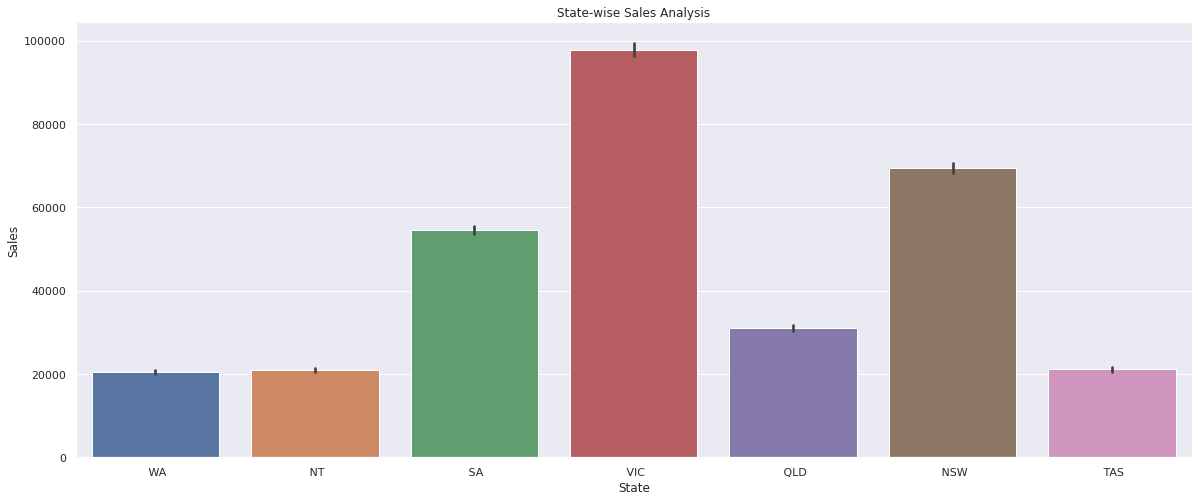

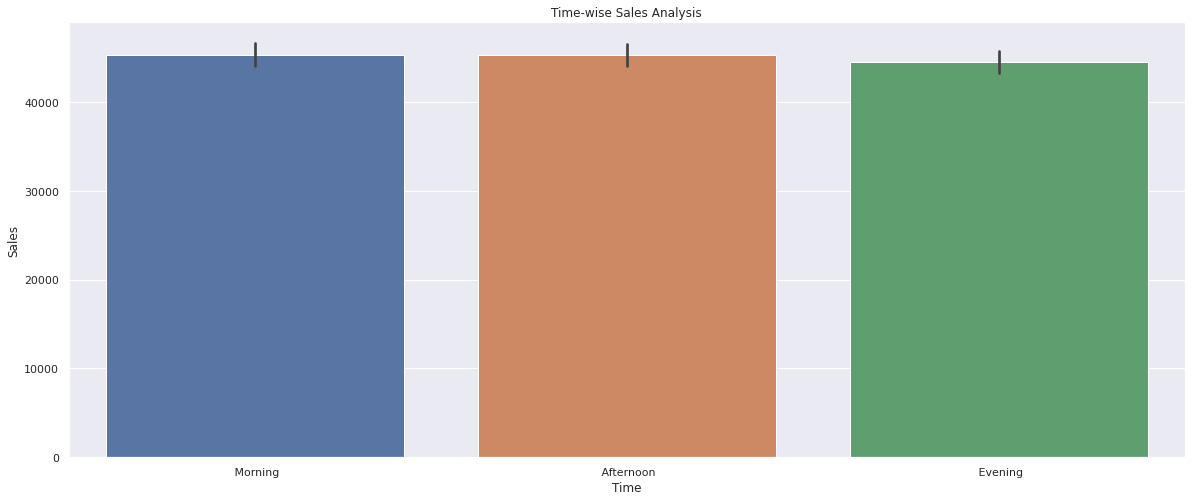

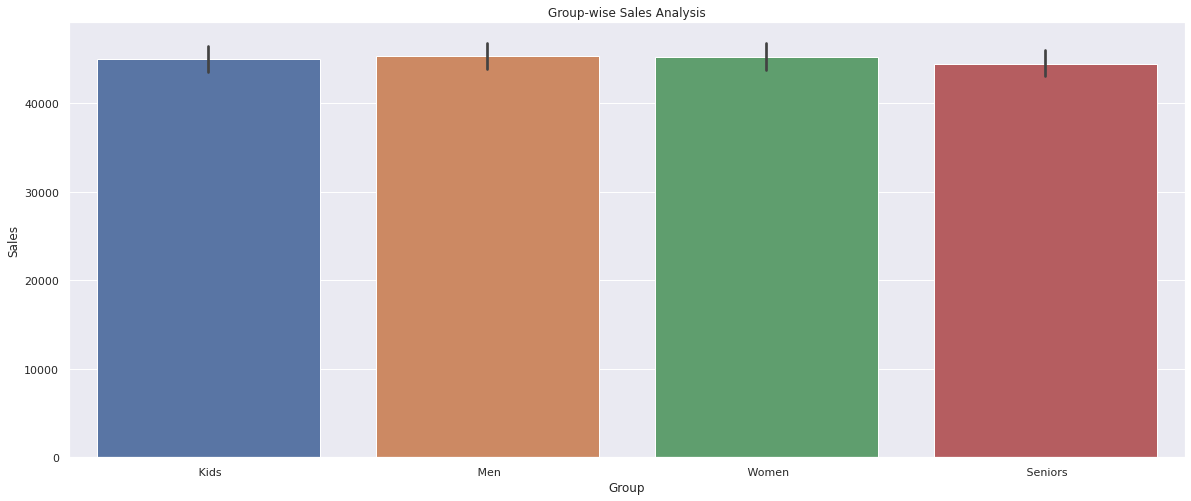

In [227]:
# Presenting Sales data Grouped by ['State', 'Time', 'Group']
for col in ['State', 'Time', 'Group']:
    sns.barplot(data=df, x=col, y='Sales')
    plt.title(f"{col}-wise Sales Analysis")
    plt.xlabel(col)
    plt.ylabel("Sales")
    plt.show()

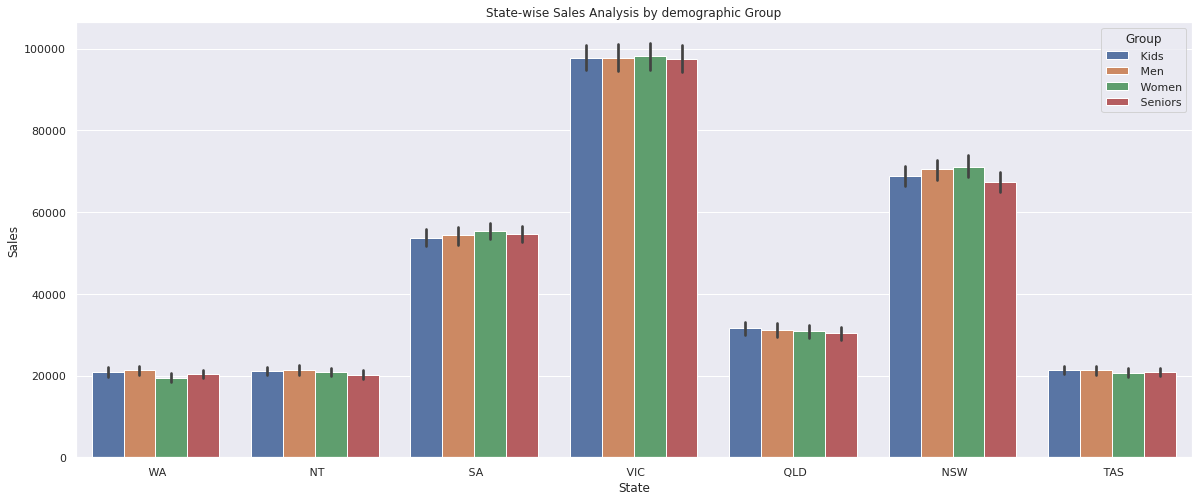

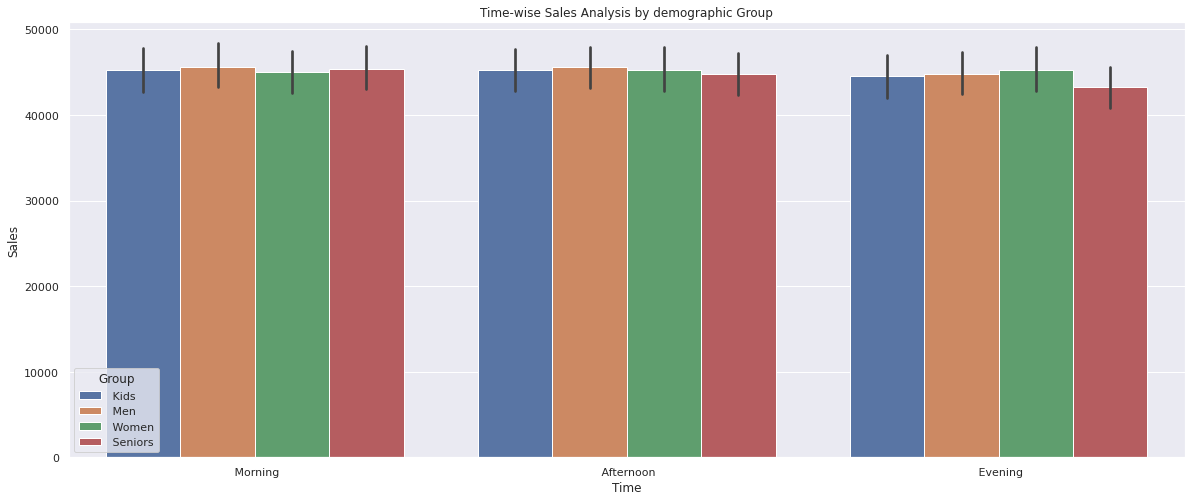

In [228]:
# Further presenting Sales data for each state and time of the day Grouped by Group
for col in ['State', 'Time']:
    sns.barplot(data=df, x=col, y='Sales', hue='Group')
    plt.title(f"{col}-wise Sales Analysis by demographic Group")
    plt.xlabel(col)
    plt.ylabel("Sales")
    plt.show()

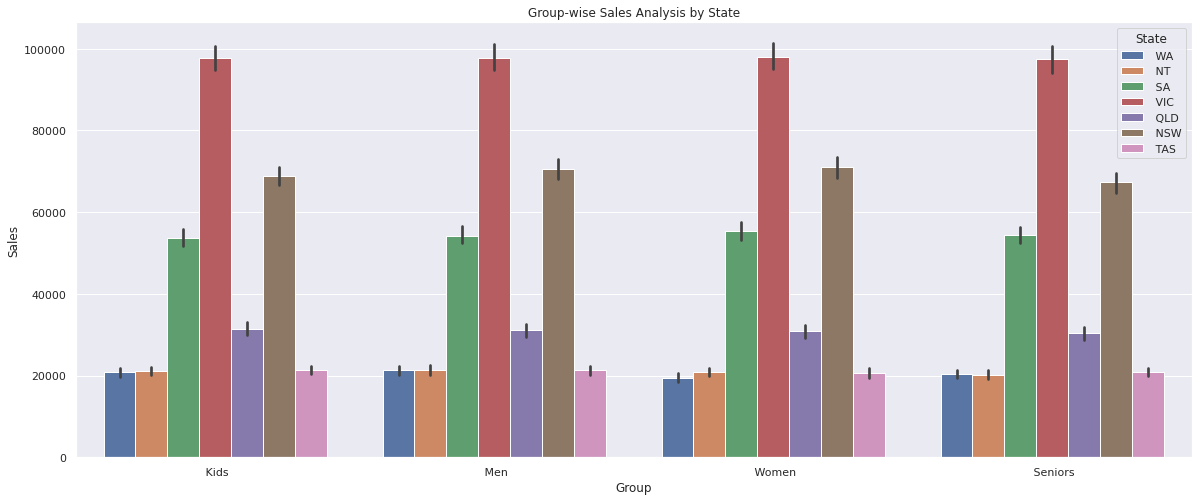

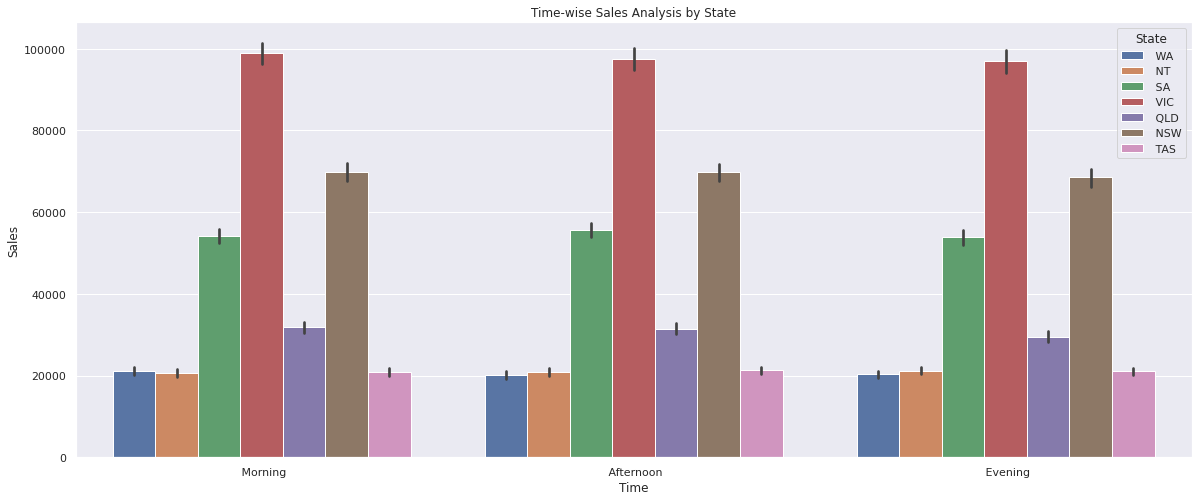

In [229]:
# Further presenting Sales data for each Demographic group and time of the day Grouped by States
for col in ['Group', 'Time']:
    sns.barplot(data=df, x=col, y='Sales', hue='State')
    plt.title(f"{col}-wise Sales Analysis by State")
    plt.xlabel(col)
    plt.ylabel("Sales")
    plt.show()

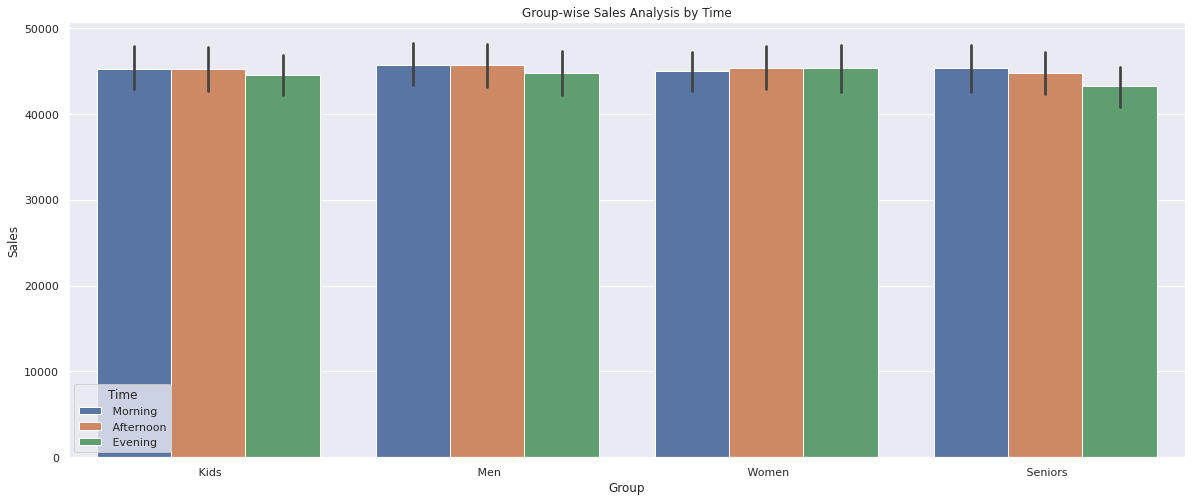

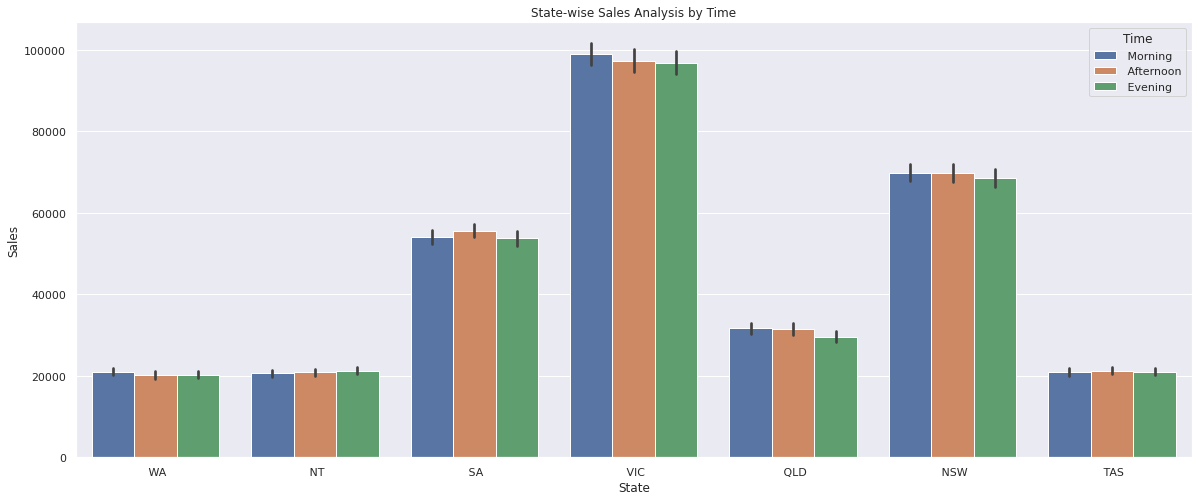

In [230]:
# Further presenting Sales data for each Demographic group and State Grouped by Time of the Day
for col in ['Group', 'State']:
    sns.barplot(data=df, x=col, y='Sales', hue='Time')
    plt.title(f"{col}-wise Sales Analysis by Time")
    plt.xlabel(col)
    plt.ylabel("Sales")
    plt.show()

## Summary:

    1. Dataset is not missing any values, nor it has any duplicate record.
    2. Though there were some otliers on over all sales data but same has not been seen on grouped data. 
    3. Group with the highest sales:  Men and Lowest Sales is - Seniors.
    4. Lowest sales oberved in Nov Month and Highest salea observed in Dec Month.
    